<a href="https://colab.research.google.com/github/Teepika/FYP/blob/main/FYP_Final_Extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
download_dir =  '/content/drive/MyDrive/pdfs/price_report'

In [ ]:

download_dir =  '/content/drive/MyDrive/pdfs/price_report'
!rm -r $download_dir
!mkdir $download_dir

In [ ]:
def process_year(year_id):
    print("year:", year_id)
    page = 0
    while True:
      url = "https://www.cbsl.gov.lk/en/views/ajax"
      form_data = {
          'page': page,
          'view_name': 'price_report',
          'view_display_id': 'block_1',
          'view_args': '',
          'view_path': 'node/144',
          'view_base_path': 'publications/price',
          'view_dom_id': '1ebc07ab802eaaf9051aa7773bfad2fc',
          'pager_element': '0',
          'field_year_tid': year_id,
          'field_month_tid': 'All'
      }

      response = requests.post(url, data=form_data)
      # Checking if the request was successful
      if response.status_code == 200:
          # Accessing the JSON response
          json_data = response.json()
          html_string = json_data[2]['data']

          soup = BeautifulSoup(html_string, 'html.parser')

          container = soup.find('div', class_='view-content')

          if (container == None):
              break

          href_list = []

          # Find all elements with id 'views-row' within the container
          views_rows = container.find_all('div', class_='views-row')

          # Loop through each views row
          for row in views_rows:
              # Find anchor tags within the row
              anchor_tags = row.find_all('a')
              # Extract href attributes and append them to href_list
              for tag in anchor_tags:
                  href_list.append(tag.get('href'))

          download_pdf(href_list)
          page +=1
      else:
          print("Failed to fetch data:", response.status_code)
          break

In [ ]:
def download_pdf(pdf_urls):
    for index, url in enumerate(pdf_urls, start=1):
        filename = f"{url.split('/')[-1]}"  # You can customize the filename here if needed
        response = requests.get(url)
        if response.status_code == 200:
            with open(os.path.join(download_dir, filename), 'wb') as f:
                f.write(response.content)
            print(f"Downloaded: {filename}")
        else:
            print(f"Failed to download: {filename}")

In [ ]:
process_year("87")
process_year("86")
process_year("85")

year: 87
Downloaded: price_report_20240529_e.pdf
Downloaded: price_report_20240529_e.pdf
Downloaded: price_report_20240528_e.pdf
Downloaded: price_report_20240528_e.pdf
Downloaded: price_report_20240527_e.pdf
Downloaded: price_report_20240527_e.pdf
Downloaded: price_report_20240522_e.pdf
Downloaded: price_report_20240522_e.pdf
Downloaded: price_report_20240521.pdf
Downloaded: price_report_20240521.pdf
Downloaded: price_report_20240520_e.pdf
Downloaded: price_report_20240520_e.pdf
Downloaded: price_report_20240517_e.pdf
Downloaded: price_report_20240517_e.pdf
Downloaded: price_report_20240516.pdf
Downloaded: price_report_20240516.pdf
Downloaded: price_report_20240515.pdf
Downloaded: price_report_20240515.pdf
Downloaded: price_report_20240514_e.pdf
Downloaded: price_report_20240514_e.pdf
Downloaded: price_report_20240513.pdf
Downloaded: price_report_20240513.pdf
Downloaded: price_report_20240510_e.pdf
Downloaded: price_report_20240510_e.pdf
Downloaded: price_report_20240509_e.pdf
Downloa

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.9 MB/s eta 0:00:00


In [ ]:
pdf_directory = '/content/drive/MyDrive/pdfs/price_report'
os.listdir(pdf_directory)

['price_report_20240529_e.pdf',
 'price_report_20240528_e.pdf',
 'price_report_20240527_e.pdf',
 'price_report_20240522_e.pdf',
 'price_report_20240521.pdf',
 'price_report_20240520_e.pdf',
 'price_report_20240517_e.pdf',
 'price_report_20240516.pdf',
 'price_report_20240515.pdf',
 'price_report_20240514_e.pdf',
 'price_report_20240513.pdf',
 'price_report_20240510_e.pdf',
 'price_report_20240509_e.pdf',
 'price_report_20240508_e.pdf',
 'price_report_20240507_e.pdf',
 'price_report_20240506_e.pdf',
 'price_report_20240503_e.pdf',
 'price_report_20240502_e.pdf',
 'price_report_20240430_e.pdf',
 'price_report_20240429_e.pdf',
 'price_report_20240426.pdf',
 'price_report_20240425_e.pdf',
 'price_report_20240424_e.pdf',
 'price_report_20240422_e.pdf',
 'price_report_20240419_e.pdf',
 'price_report_20240418_e.pdf',
 'price_report_20240417_e.pdf',
 'price_report_20240416.pdf',
 'price_report_20240415.pdf',
 'price_report_20240410.pdf',
 'price_report_20240409_e.pdf',
 'price_report_20240408_

In [ ]:
import os
import pdfplumber
import re
import pandas as pd

# Directory containing PDF files
pdf_directory = '/content/drive/MyDrive/pdfs/price_report'

# Define a function to extract prices for a specific vegetable
def extract_vegetable_prices(vegetable_name, text):
    pattern = re.compile(f'{vegetable_name} Rs./kg (.+)')
    match = pattern.search(text)

    if match:
        prices_str = match.group(1)
        space_removed = prices_str.replace(" ", "").replace(",", "").replace("n.a.", ".00")
        # prices_with_gap = match.group(1).split()
        # prices_fixed_gap = [f"{prices_with_gap[i]}{prices_with_gap[i+1]}" for i in range(0, len(prices_with_gap), 2)]

        splitted_list = space_removed.split('.00')[:-1]
        prices_list = [(string + '.00') if string else string for string in splitted_list]
        return prices_list
    else:
        return []

# List of vegetable names
vegetable_names = ["Beans", "Carrot", "Cabbage", "Tomato", "Brinjal", "Pumpkin", "Snake gourd", "Green Chilli", "Lime"]

# Initialize an empty DataFrame to store the data
data = []

# Loop through each PDF file in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            # Open the PDF file
            with pdfplumber.open(pdf_path) as pdf:
                # Initialize text for storing extracted text from all pages
                all_text = ""

                # Iterate over each page in the PDF
                for page in pdf.pages:
                    # Extract text from the page and append to all_text
                    all_text += page.extract_text()

            # Define a regular expression pattern to match the section containing vegetable prices
            vegetable_pattern = re.compile(r"V E G E T A B L E S(.*?)O T H E R", re.DOTALL)

            # Find the match in the extracted text
            vegetable_match = vegetable_pattern.search(all_text)

            # Extract the matched portion (containing vegetable prices)
            vegetable_prices_section = vegetable_match.group(1).strip() if vegetable_match else ""

            # Extract prices for each vegetable
            for vegetable_name in vegetable_names:
                vegetable_prices = extract_vegetable_prices(vegetable_name, vegetable_prices_section)
                # Append the data to the list
                data.append({
                    'PDF Filename': filename,
                    'Vegetable Name': vegetable_name,
                    'Price (Rs./kg)': vegetable_prices
                })

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

# Determine the maximum number of prices extracted for any vegetable
max_prices = max(df['Price (Rs./kg)'].dropna().apply(len))

# Create column names for prices dynamically
price_columns = [f'Price (Rs./kg)_{i+1}' for i in range(max_prices)]

# Split the list of prices into separate columns
df[price_columns] = pd.DataFrame(df['Price (Rs./kg)'].tolist())

# Drop the original 'Price (Rs./kg)' column
df.drop(columns=['Price (Rs./kg)'], inplace=True)

# Print the DataFrame for debugging
print("DataFrame:")
print(df)

# Save the DataFrame to an Excel file
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices.xlsx'
df.to_excel(excel_filename, index=False)

print("Data saved to Excel file:", excel_filename)

Error processing price_report_20220914.pdf: No /Root object! - Is this really a PDF?
DataFrame:
                     PDF Filename Vegetable Name Price (Rs./kg)_1  \
0     price_report_20240529_e.pdf          Beans           750.00   
1     price_report_20240529_e.pdf         Carrot           150.00   
2     price_report_20240529_e.pdf        Cabbage            60.00   
3     price_report_20240529_e.pdf         Tomato           130.00   
4     price_report_20240529_e.pdf        Brinjal           200.00   
...                           ...            ...              ...   
5179    price_report_20220103.pdf        Brinjal           350.00   
5180    price_report_20220103.pdf        Pumpkin            60.00   
5181    price_report_20220103.pdf    Snake gourd           260.00   
5182    price_report_20220103.pdf   Green Chilli          1000.00   
5183    price_report_20220103.pdf           Lime           150.00   

     Price (Rs./kg)_2 Price (Rs./kg)_3 Price (Rs./kg)_4 Price (Rs./kg)_5  \

In [ ]:
pip install xlsxwriter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
'''
import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices.xlsx'
df = pd.read_excel(excel_filename)

# Extract all rows related to "Beans"
beans_df = df[df['Vegetable Name'] == 'Beans']

# Define the output filename for Beans
output_filename_beans = '/content/drive/MyDrive/pdfs/Beans_prices.xlsx'

# Save the extracted Beans data to a new Excel file
beans_df.to_excel(output_filename_beans, index=False)

print(f"Data for Beans saved to Excel file: {output_filename_beans}")
'''

Data for Beans saved to Excel file: /content/drive/MyDrive/pdfs/Beans_prices.xlsx


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices.xlsx'
df = pd.read_excel(excel_filename)

# List of unique vegetable names
vegetable_names = df['Vegetable Name'].unique()

# Define the output filename
output_filename = '/content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx'

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter(output_filename, engine='xlsxwriter') as writer:
    # Loop through each vegetable to write data to a separate sheet
    for vegetable in vegetable_names:
        vegetable_df = df[df['Vegetable Name'] == vegetable]
        vegetable_df.to_excel(writer, sheet_name=vegetable, index=False)

print(f"Data for all vegetables saved to Excel file with separate sheets: {output_filename}")


Data for all vegetables saved to Excel file with separate sheets: /content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices.xlsx'
df = pd.read_excel(excel_filename)

# List of unique vegetable names
vegetable_names = df['Vegetable Name'].unique()

# Define the output filename
output_filename = '/content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx'

# Define the dictionary to rename the columns
column_names_mapping = {
    'Price (Rs./kg)_1': 'Yesterday Wholesale prices in Pettah',
    'Price (Rs./kg)_2': 'Today Wholesale prices in Pettah',
    'Price (Rs./kg)_3': 'Yesterday Wholesale prices in Dambulla',
    'Price (Rs./kg)_4': 'Today Wholesale prices in Dambulla',
    'Price (Rs./kg)_5': 'Yesterday Retail prices in Pettah',
    'Price (Rs./kg)_6': 'Today Retail prices in Pettah',
    'Price (Rs./kg)_7': 'Yesterday Retail prices in Dambulla',
    'Price (Rs./kg)_8': 'Today Retail prices in Dambulla',
    'Price (Rs./kg)_9': 'Yesterday Retail prices in Narahenpita',
    'Price (Rs./kg)_10': 'Today Retail prices in Narahenpita'
}

# Rename the columns in the DataFrame
df.rename(columns=column_names_mapping, inplace=True)

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter(output_filename, engine='xlsxwriter') as writer:
    # Loop through each vegetable to write data to a separate sheet
    for vegetable in vegetable_names:
        vegetable_df = df[df['Vegetable Name'] == vegetable]
        vegetable_df.to_excel(writer, sheet_name=vegetable, index=False)

print(f"Columns renamed and data saved to {output_filename}.")


Columns renamed and data saved to /content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx.


In [ ]:


# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx'

# Create a Pandas ExcelFile object
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Define the output filename
processed_excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'

# Create a Pandas Excel writer using openpyxl as the engine
with pd.ExcelWriter(processed_excel_filename, engine='openpyxl') as writer:

    # Write each sheet's data with filled null values to the new Excel file
    for sheet in sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet)

        # Fill null values with previous non-null values
        df.fillna(method='ffill', inplace=True)

        # Write the updated DataFrame to the same sheet
        df.to_excel(writer, sheet_name=sheet, index=False)



print(f"Null values filled with previous values in all sheets and saved to {processed_excel_filename}.")


Null values filled with previous values in all sheets and saved to /content/drive/MyDrive/pdfs/filled_null.xlsx.


In [ ]:

import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/vegetable_prices_with_sheets.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Define the output filename
processed_excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'

# Create a Pandas Excel writer using openpyxl as the engine
with pd.ExcelWriter(processed_excel_filename, engine='openpyxl') as writer:

    # Loop through each sheet
    for sheet in sheet_names:
        # Read the sheet into a DataFrame
        df = pd.read_excel(xls, sheet_name=sheet)

        # Fill null values with previous non-null values
        df.fillna(method='ffill', inplace=True)

        # Replace the value in the 'PDF Filename' column
        df['PDF Filename'] = df['PDF Filename'].replace('price_report_20200824e_0.pdf', 'price_report_20230824e_0.pdf')

        # Write the updated DataFrame to the same sheet
        df.to_excel(writer, sheet_name=sheet, index=False)

print(f"Null values filled with previous values and 'PDF Filename' replaced in all sheets. Updated file saved to {processed_excel_filename}.")



Null values filled with previous values and 'PDF Filename' replaced in all sheets. Updated file saved to /content/drive/MyDrive/pdfs/filled_null.xlsx.


**Visulization of Pettah Market**

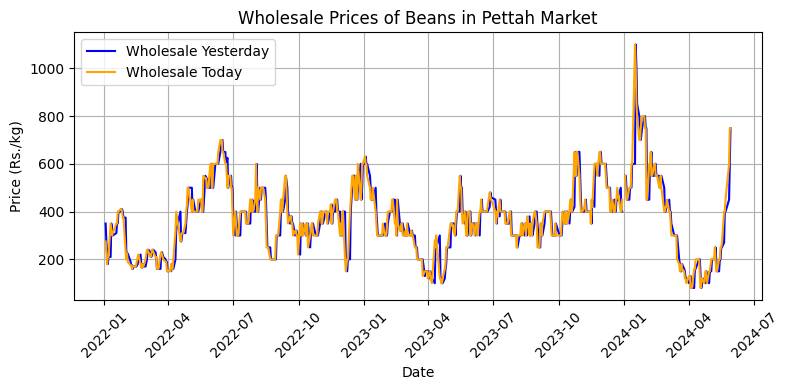

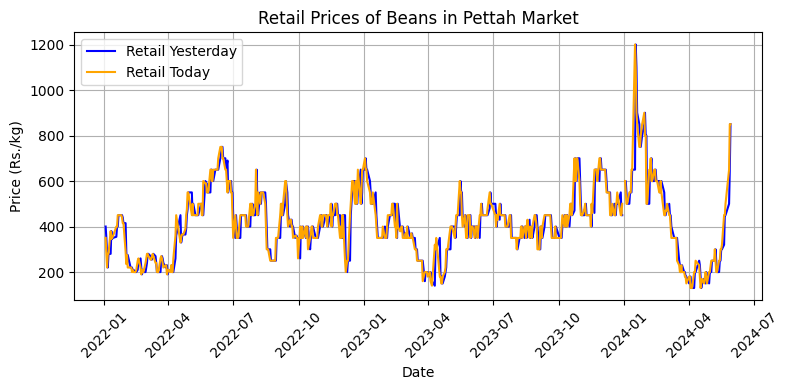

In [ ]:
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
df_beans = pd.read_excel(excel_filename, sheet_name='Beans')

# Extract the dates from the 'PDF Filename' column
df_beans['Date'] = pd.to_datetime(df_beans['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
dates = df_beans['Date']

# Extract data for wholesale in Pettah market yesterday and today
wholesale_pettah_yesterday = df_beans['Yesterday Wholesale prices in Pettah']
wholesale_pettah_today = df_beans['Today Wholesale prices in Pettah']

# Extract data for retail prices in Pettah market yesterday and today
retail_pettah_yesterday = df_beans['Yesterday Retail prices in Pettah']
retail_pettah_today = df_beans['Today Retail prices in Pettah']

# Plot wholesale prices
plt.figure(figsize=(8, 4))
plt.plot(dates, wholesale_pettah_yesterday, color='blue', label='Wholesale Yesterday')
plt.plot(dates, wholesale_pettah_today, color='orange', label='Wholesale Today')
plt.title('Wholesale Prices of Beans in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot retail prices
plt.figure(figsize=(8, 4))
plt.plot(dates, retail_pettah_yesterday, color='blue',  label='Retail Yesterday')
plt.plot(dates, retail_pettah_today, color='orange', label='Retail Today')
plt.title('Retail Prices of Beans in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


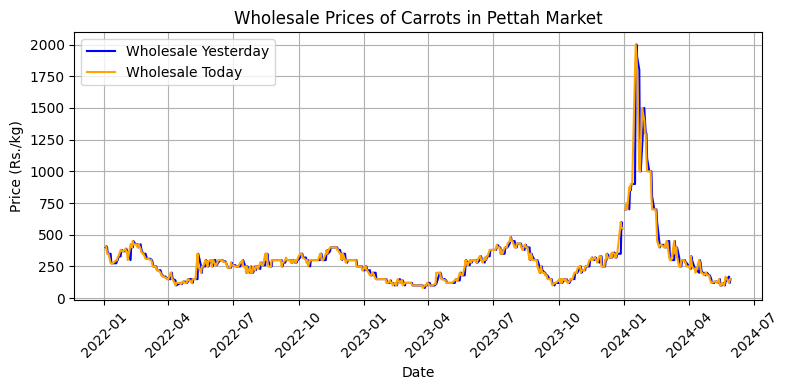

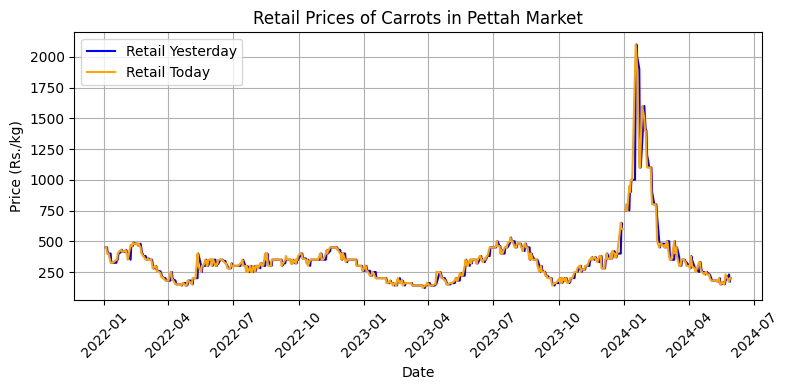

In [ ]:

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
df_carrot = pd.read_excel(excel_filename, sheet_name='Carrot')

# Extract dates and prices
dates = pd.to_datetime(df_carrot['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
wholesale_yesterday, wholesale_today = df_carrot[['Yesterday Wholesale prices in Pettah', 'Today Wholesale prices in Pettah']].values.T
retail_yesterday, retail_today = df_carrot[['Yesterday Retail prices in Pettah', 'Today Retail prices in Pettah']].values.T

# Plot wholesale prices
plt.figure(figsize=(8, 4))
plt.plot(dates, wholesale_yesterday, 'blue', label='Wholesale Yesterday')
plt.plot(dates, wholesale_today, 'orange', label='Wholesale Today')
plt.title('Wholesale Prices of Carrots in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot retail prices
plt.figure(figsize=(8, 4))
plt.plot(dates, retail_yesterday, 'blue', label='Retail Yesterday')
plt.plot(dates, retail_today, 'orange', label='Retail Today')
plt.title('Retail Prices of Carrots in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

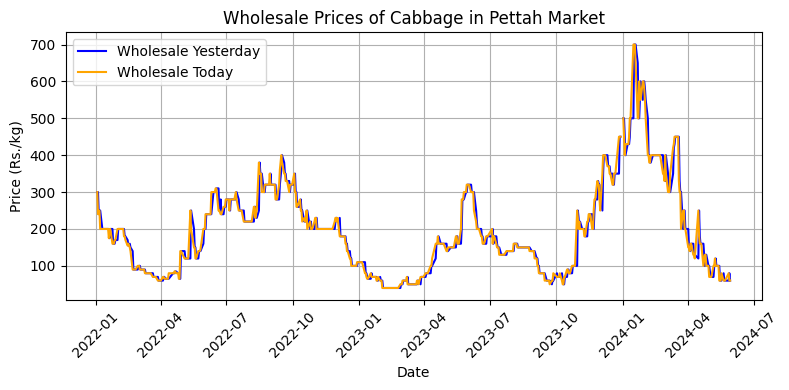

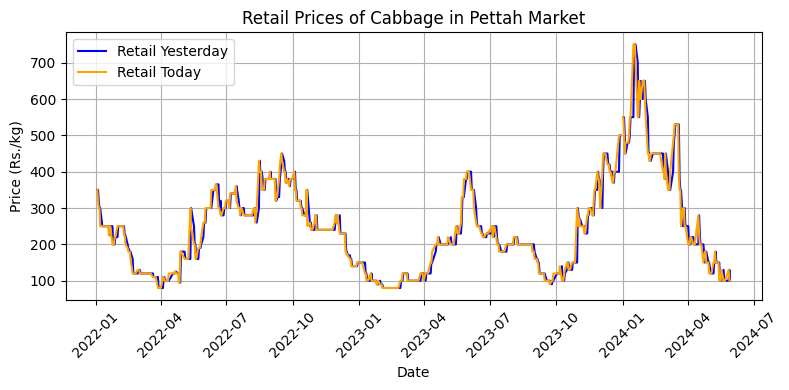

In [ ]:
# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
df_cabbage = pd.read_excel(excel_filename, sheet_name='Cabbage')

# Extract dates and prices
dates = pd.to_datetime(df_cabbage['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
wholesale_yesterday, wholesale_today = df_cabbage[['Yesterday Wholesale prices in Pettah', 'Today Wholesale prices in Pettah']].values.T
retail_yesterday, retail_today = df_cabbage[['Yesterday Retail prices in Pettah', 'Today Retail prices in Pettah']].values.T

# Plot wholesale prices
plt.figure(figsize=(8, 4))
plt.plot(dates, wholesale_yesterday, 'blue', label='Wholesale Yesterday')
plt.plot(dates, wholesale_today, 'orange', label='Wholesale Today')
plt.title('Wholesale Prices of Cabbage in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot retail prices
plt.figure(figsize=(8, 4))
plt.plot(dates, retail_yesterday, 'blue', label='Retail Yesterday')
plt.plot(dates, retail_today, 'orange', label='Retail Today')
plt.title('Retail Prices of Cabbage in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


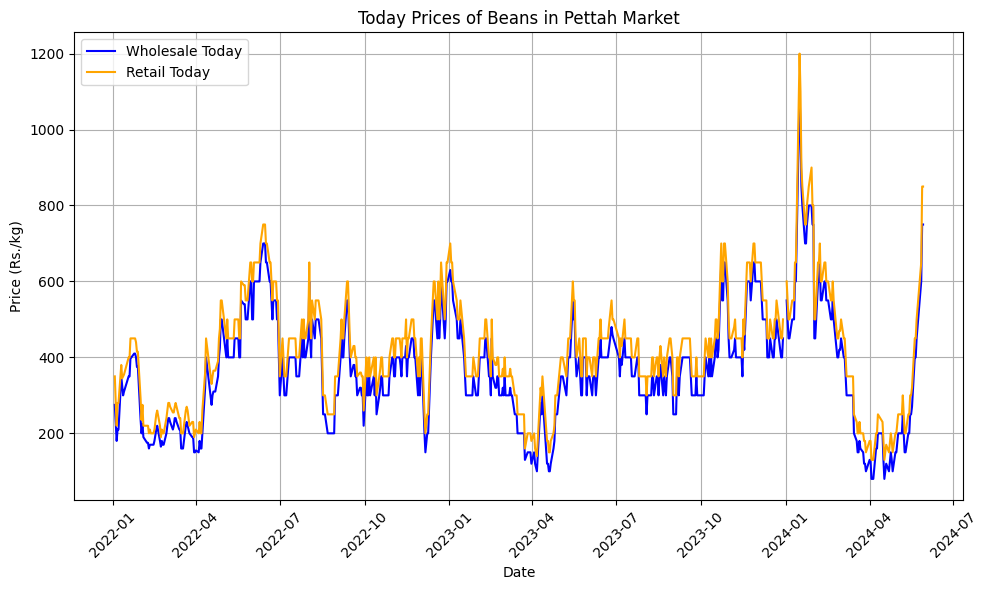

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
df_beans = pd.read_excel(excel_filename, sheet_name='Beans')

# Extract dates and prices
dates = pd.to_datetime(df_beans['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
wholesale_today = df_beans['Today Wholesale prices in Pettah']
retail_today = df_beans['Today Retail prices in Pettah']

# Plot wholesale and retail prices
plt.figure(figsize=(10, 6))
plt.plot(dates, wholesale_today, 'blue', label='Wholesale Today')
plt.plot(dates, retail_today, 'orange', label='Retail Today')
plt.title('Today Prices of Beans in Pettah Market')
plt.xlabel('Date')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


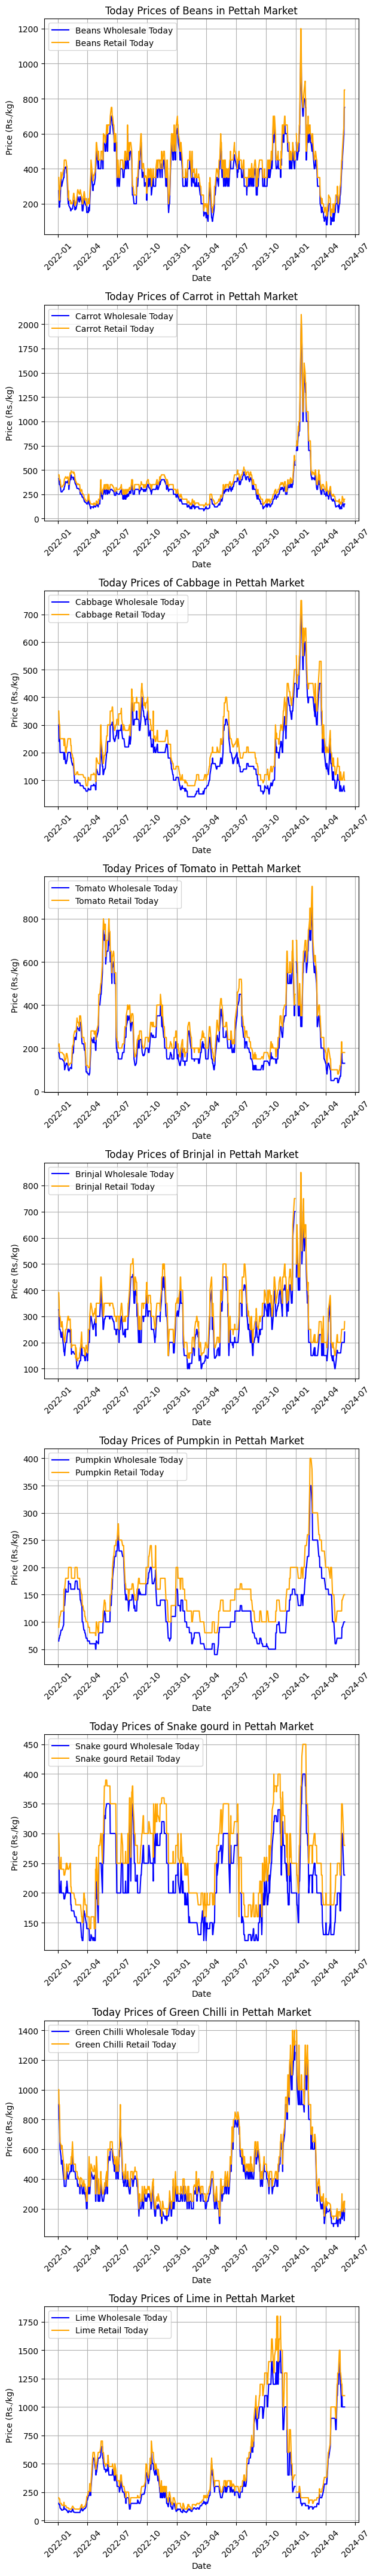

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Create a figure and axes
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(6.4, 4.8 * len(sheet_names)))

# Iterate over each sheet (vegetable)
for i, sheet_name in enumerate(sheet_names):
    # Read data for the current vegetable
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates and prices
    dates = pd.to_datetime(df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
    wholesale_today = df['Today Wholesale prices in Pettah']
    retail_today = df['Today Retail prices in Pettah']

    # Plot wholesale and retail prices for the current vegetable
    axes[i].plot(dates, wholesale_today, label=f'{sheet_name} Wholesale Today', color='blue')
    axes[i].plot(dates, retail_today, label=f'{sheet_name} Retail Today', color='orange')

    # Customize the plot
    axes[i].set_title(f'Today Prices of {sheet_name} in Pettah Market')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rs./kg)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



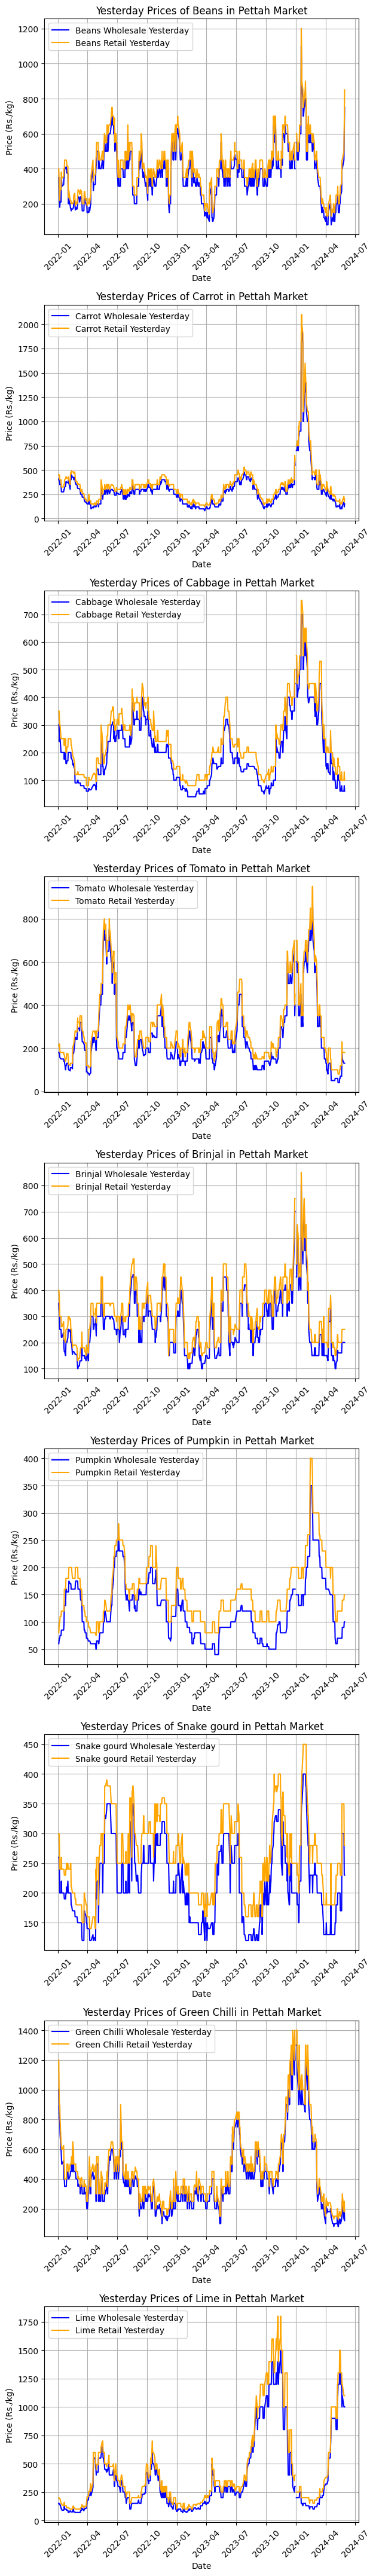

In [ ]:


# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Create a figure and axes
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(6.4, 4.8 * len(sheet_names)))

# Iterate over each sheet (vegetable)
for i, sheet_name in enumerate(sheet_names):
    # Read data for the current vegetable
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates and prices
    dates = pd.to_datetime(df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
    wholesale_yesterday = df['Yesterday Wholesale prices in Pettah']
    retail_yesterday = df['Yesterday Retail prices in Pettah']

    # Plot wholesale and retail prices for the current vegetable
    axes[i].plot(dates, wholesale_yesterday, label=f'{sheet_name} Wholesale Yesterday', color='blue')
    axes[i].plot(dates, retail_yesterday, label=f'{sheet_name} Retail Yesterday', color='orange')

    # Customize the plot
    axes[i].set_title(f'Yesterday Prices of {sheet_name} in Pettah Market')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rs./kg)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



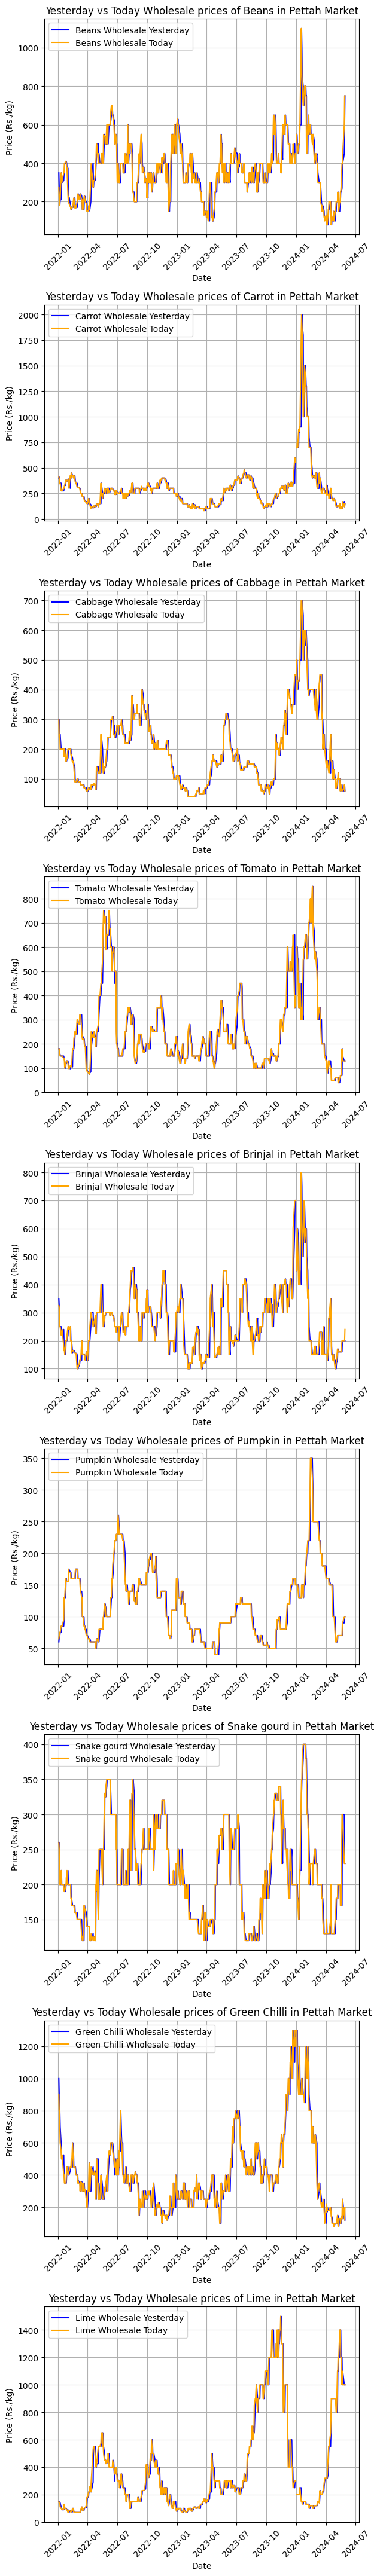

In [ ]:


# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Create a figure and axes
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(6.4, 4.8 * len(sheet_names)))

# Iterate over each sheet (vegetable)
for i, sheet_name in enumerate(sheet_names):
    # Read data for the current vegetable
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates and prices
    dates = pd.to_datetime(df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
    wholesale_yesterday = df['Yesterday Wholesale prices in Pettah']
    wholesale_today = df['Today Wholesale prices in Pettah']

    # Plot wholesale and retail prices for the current vegetable
    axes[i].plot(dates, wholesale_yesterday, label=f'{sheet_name} Wholesale Yesterday', color='blue')
    axes[i].plot(dates, wholesale_today, label=f'{sheet_name} Wholesale Today', color='orange')

    # Customize the plot
    axes[i].set_title(f'Yesterday vs Today Wholesale prices of {sheet_name} in Pettah Market')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rs./kg)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



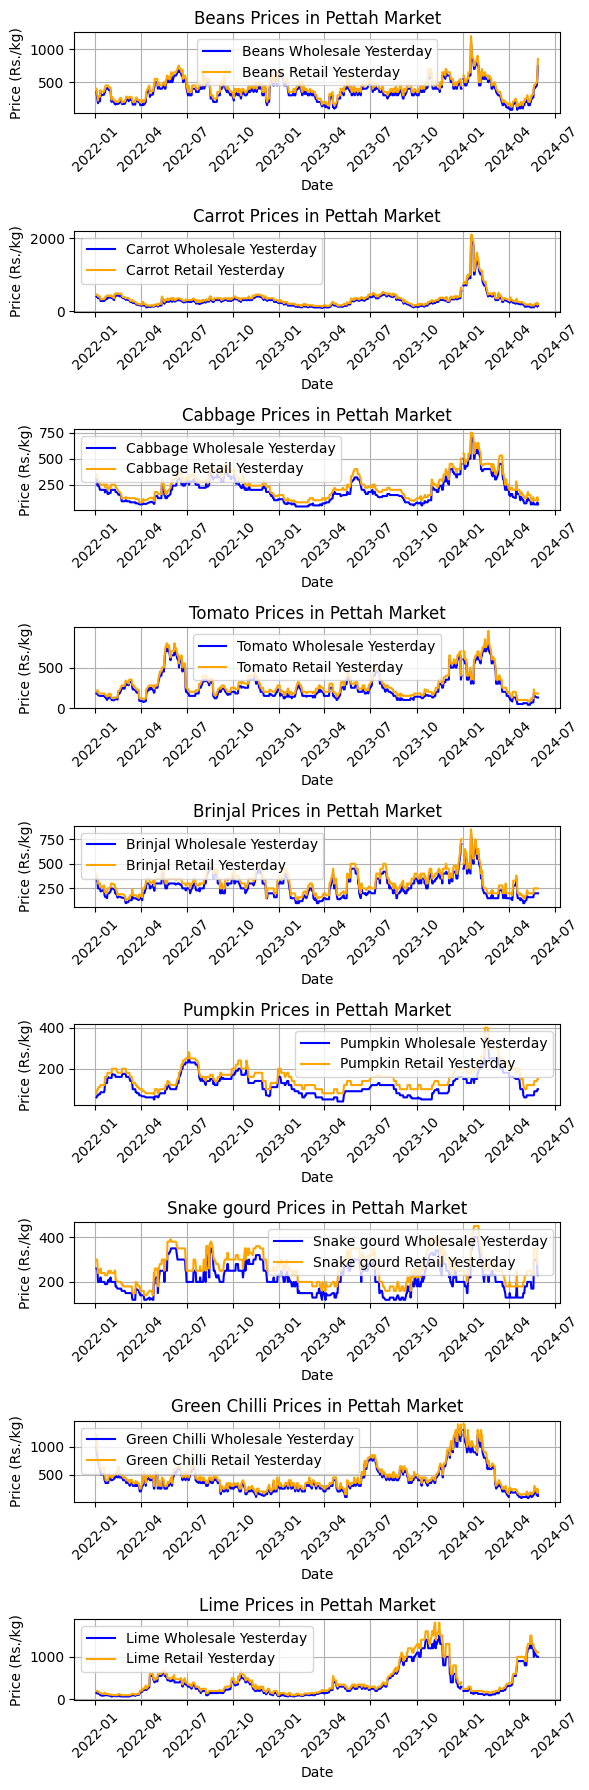

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Calculate number of rows and columns for subplots
num_sheets = len(sheet_names)
num_cols = 1  # Each subplot will be in a separate column
num_rows = num_sheets  # Each subplot will be in a separate row

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 2 * num_rows))

# Flatten axes if num_rows is 1
if num_rows == 1:
    axes = [axes]

# Iterate over each sheet (vegetable)
for i, sheet_name in enumerate(sheet_names):
    # Read data for the current vegetable
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates and prices
    dates = pd.to_datetime(df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
    wholesale_yesterday = df['Yesterday Wholesale prices in Pettah']
    retail_yesterday = df['Yesterday Retail prices in Pettah']

    # Plot wholesale and retail prices for the current vegetable
    axes[i].plot(dates, wholesale_yesterday, label=f'{sheet_name} Wholesale Yesterday', color='blue')
    axes[i].plot(dates, retail_yesterday, label=f'{sheet_name} Retail Yesterday', color='orange')

    # Customize the plot
    axes[i].set_title(f'{sheet_name} Prices in Pettah Market')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rs./kg)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


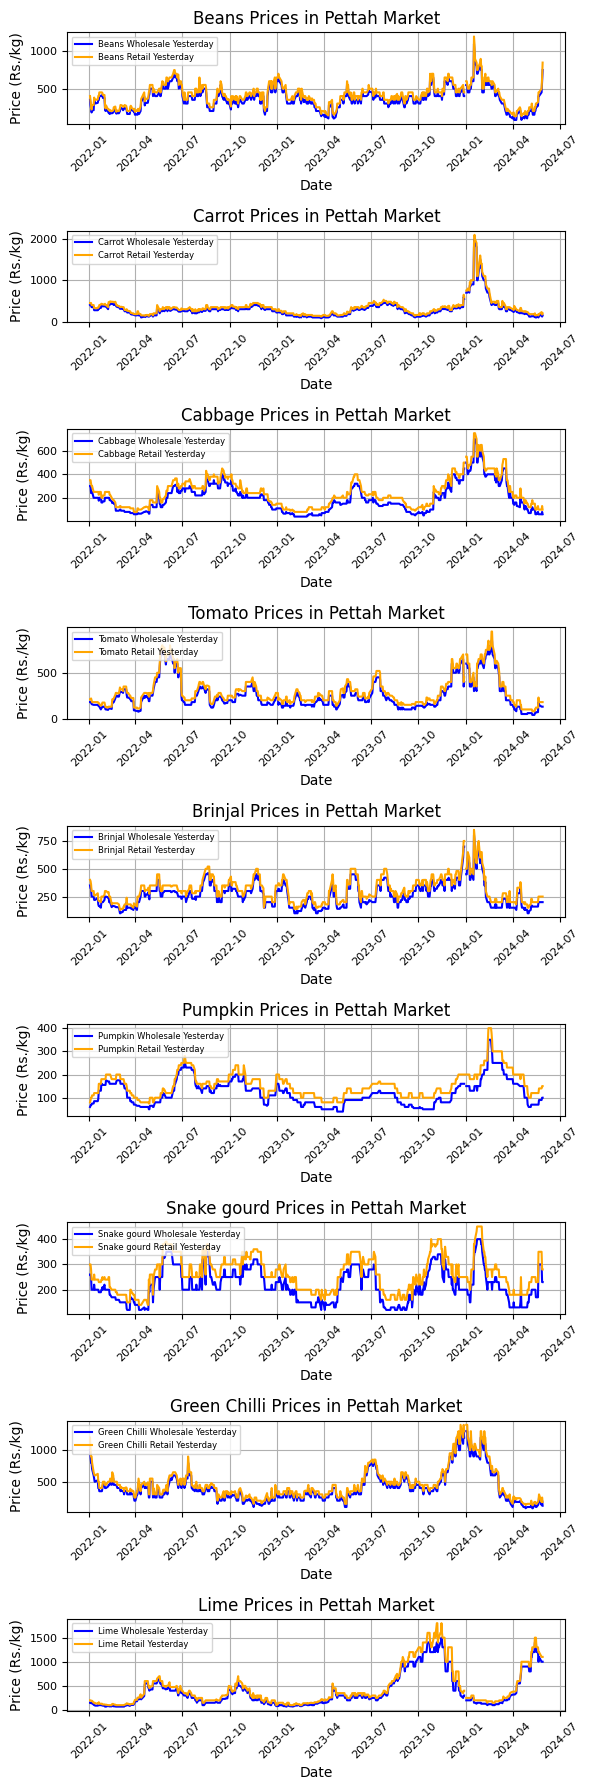

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Calculate number of rows and columns for subplots
num_sheets = len(sheet_names)
num_cols = 1  # Each subplot will be in a separate column
num_rows = num_sheets  # Each subplot will be in a separate row

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 2 * num_rows))

# Flatten axes if num_rows is 1
if num_rows == 1:
    axes = [axes]

# Iterate over each sheet (vegetable)
for i, sheet_name in enumerate(sheet_names):
    # Read data for the current vegetable
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates and prices
    dates = pd.to_datetime(df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d')
    wholesale_yesterday = df['Yesterday Wholesale prices in Pettah']
    retail_yesterday = df['Yesterday Retail prices in Pettah']

    # Plot wholesale and retail prices for the current vegetable
    axes[i].plot(dates, wholesale_yesterday, label=f'{sheet_name} Wholesale Yesterday', color='blue')
    axes[i].plot(dates, retail_yesterday, label=f'{sheet_name} Retail Yesterday', color='orange')

    # Customize the plot
    axes[i].set_title(f'{sheet_name} Prices in Pettah Market')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rs./kg)')
    axes[i].legend(loc='upper left', fontsize=6)   # Adjust legend font size
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Adjust label size for x-axis
    axes[i].tick_params(axis='y', labelsize=8)  # Adjust label size for y-axis

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Dictionary to hold the updated DataFrames
updated_dfs = {}

# Iterate through each sheet
for sheet_name in sheet_names:
    # Load the current sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates from filenames with two possible patterns
    df['Date'] = pd.to_datetime(
        df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d', errors='coerce'
    )

    # Handle the alternative date format
    missing_dates_mask = df['Date'].isna()
    df.loc[missing_dates_mask, 'Date'] = pd.to_datetime(
        df.loc[missing_dates_mask, 'PDF Filename']
        .str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce'
    )

    # Add the updated DataFrame to the dictionary
    updated_dfs[sheet_name] = df

# Save the updated DataFrames to a new Excel file
updated_excel_filename = '/content/drive/MyDrive/pdfs/filled_null_with_dates.xlsx'
with pd.ExcelWriter(updated_excel_filename) as writer:
    for sheet_name, df in updated_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Updated Excel file saved as '{updated_excel_filename}'")


Updated Excel file saved as '/content/drive/MyDrive/pdfs/filled_null_with_dates.xlsx'


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null.xlsx'
xls = pd.ExcelFile(excel_filename)

# Get sheet names
sheet_names = xls.sheet_names

# Dictionary to hold the updated DataFrames
updated_dfs = {}

# Iterate through each sheet
for sheet_name in sheet_names:
    # Load the current sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Extract dates from filenames with two possible patterns
    df['Date'] = pd.to_datetime(
        df['PDF Filename'].str.extract(r'(\d{8})')[0], format='%Y%m%d', errors='coerce'
    )

    # Handle the alternative date format
    missing_dates_mask = df['Date'].isna()
    df.loc[missing_dates_mask, 'Date'] = pd.to_datetime(
        df.loc[missing_dates_mask, 'PDF Filename']
        .str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce'
    )

    # Calculate the average prices for Pettah (wholesale and retail)
    df['Average Pettah Wholesale Price'] = df[['Yesterday Wholesale prices in Pettah', 'Today Wholesale prices in Pettah']].mean(axis=1)
    df['Average Pettah Retail Price'] = df[['Yesterday Retail prices in Pettah', 'Today Retail prices in Pettah']].mean(axis=1)

    # Add the updated DataFrame to the dictionary
    updated_dfs[sheet_name] = df

# Save the updated DataFrames to a new Excel file
updated_excel_filename = '/content/drive/MyDrive/pdfs/filled_null_with_dates_and_averages.xlsx'
with pd.ExcelWriter(updated_excel_filename) as writer:
    for sheet_name, df in updated_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Updated Excel file saved as '{updated_excel_filename}'")


Updated Excel file saved as '/content/drive/MyDrive/pdfs/filled_null_with_dates_and_averages.xlsx'


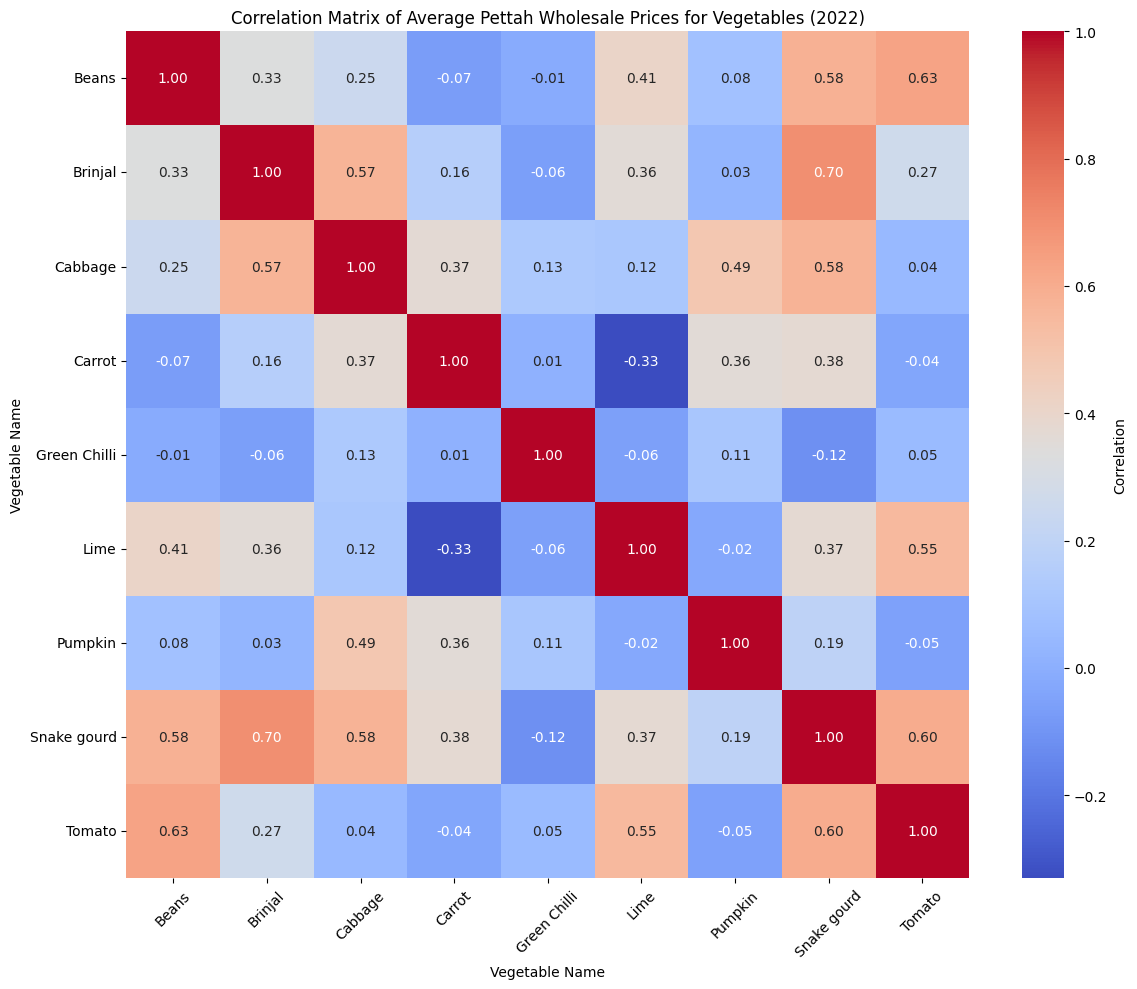

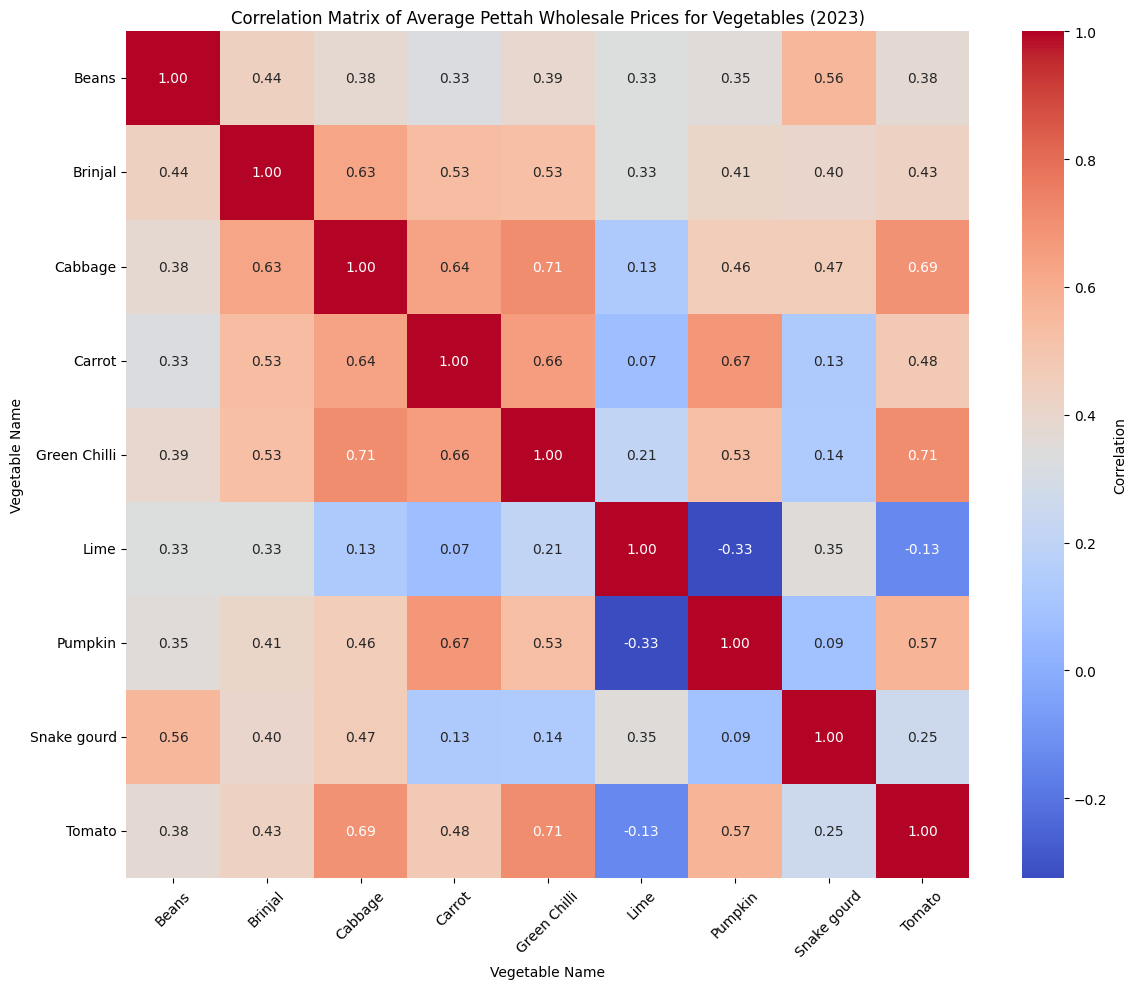

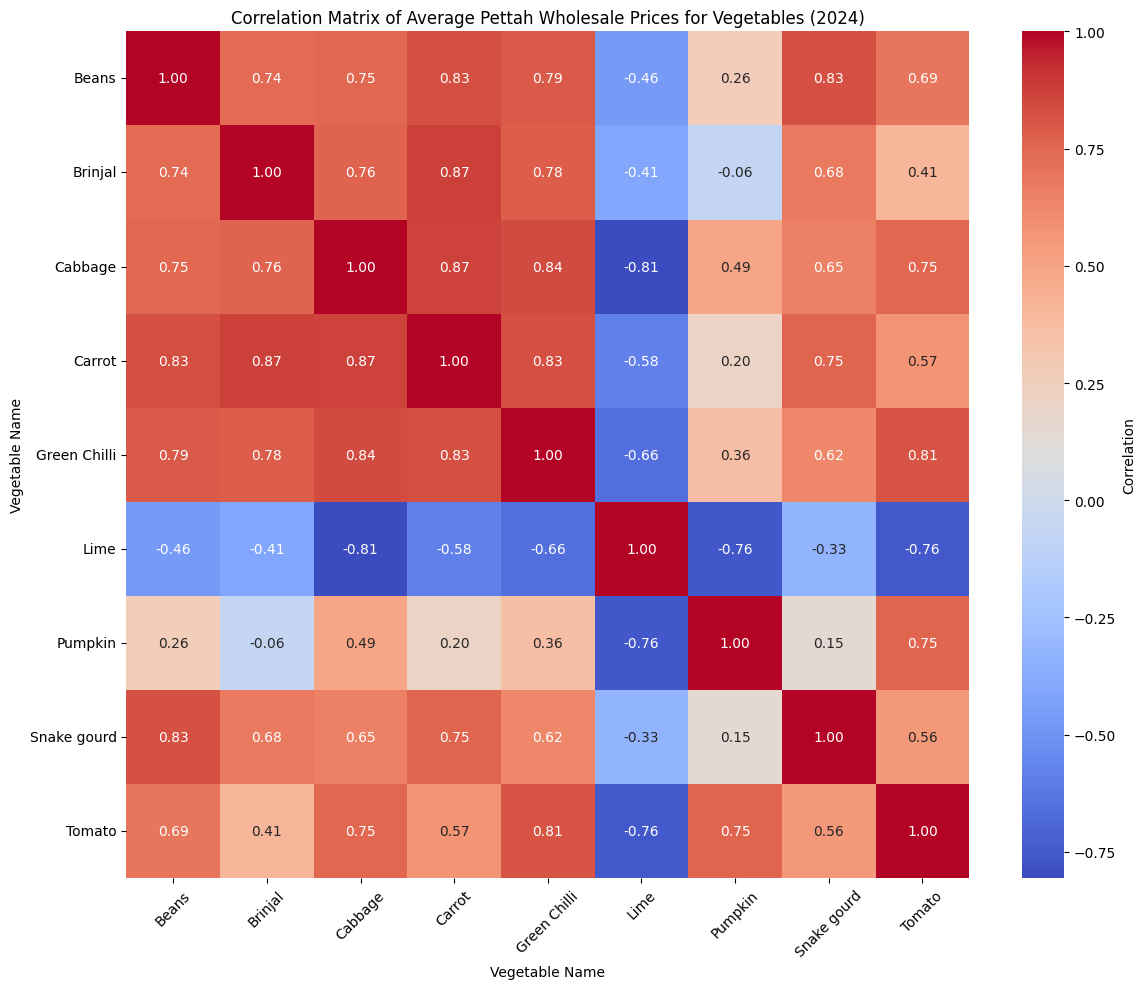

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null_with_dates_and_averages.xlsx'
xls = pd.ExcelFile(excel_filename)

# Combine data from all sheets into a single DataFrame
all_data = pd.concat([pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names], ignore_index=True)

# Ensure Date column is parsed
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')

# Extract year from the date
all_data['Year'] = all_data['Date'].dt.year

# List of years to analyze
years_to_analyze = [2022, 2023, 2024]

for year in years_to_analyze:
    # Filter the data for the current year
    data_year = all_data[all_data['Year'] == year]

    # Verify if we have any data for the current year
    if data_year.empty:
        print(f"No data available for the year {year}.")
    else:
        # Check if the average prices are already calculated
        if 'Average Pettah Wholesale Price' not in data_year.columns:
            # Calculate the Average Pettah Wholesale Price for each vegetable
            data_year['Average Pettah Wholesale Price'] = data_year[
                ['Yesterday Wholesale prices in Pettah', 'Today Wholesale prices in Pettah']
            ].mean(axis=1)

        # Create a pivot table with vegetables as columns and average prices as values
        pivot_table_year = data_year.pivot_table(
            index='Date',
            columns='Vegetable Name',
            values='Average Pettah Wholesale Price',
            aggfunc='mean'
        )

        # Drop columns with all NaN values
        pivot_table_year.dropna(axis=1, how='all', inplace=True)

        # Verify if the pivot table has valid data
        if pivot_table_year.empty:
            print(f"No valid data available for calculating the correlation matrix in {year}.")
        else:
            # Calculate the correlation matrix for vegetables
            corr_matrix_year = pivot_table_year.corr()

            # Check if correlation matrix is not empty
            if corr_matrix_year.empty:
                print(f"The correlation matrix is empty for the year {year}. Check for data issues.")
            else:
                # Plot the correlation matrix
                plt.figure(figsize=(12, 10))
                sns.heatmap(corr_matrix_year, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
                plt.title(f'Correlation Matrix of Average Pettah Wholesale Prices for Vegetables ({year})')
                plt.xticks(rotation=45)
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.show()


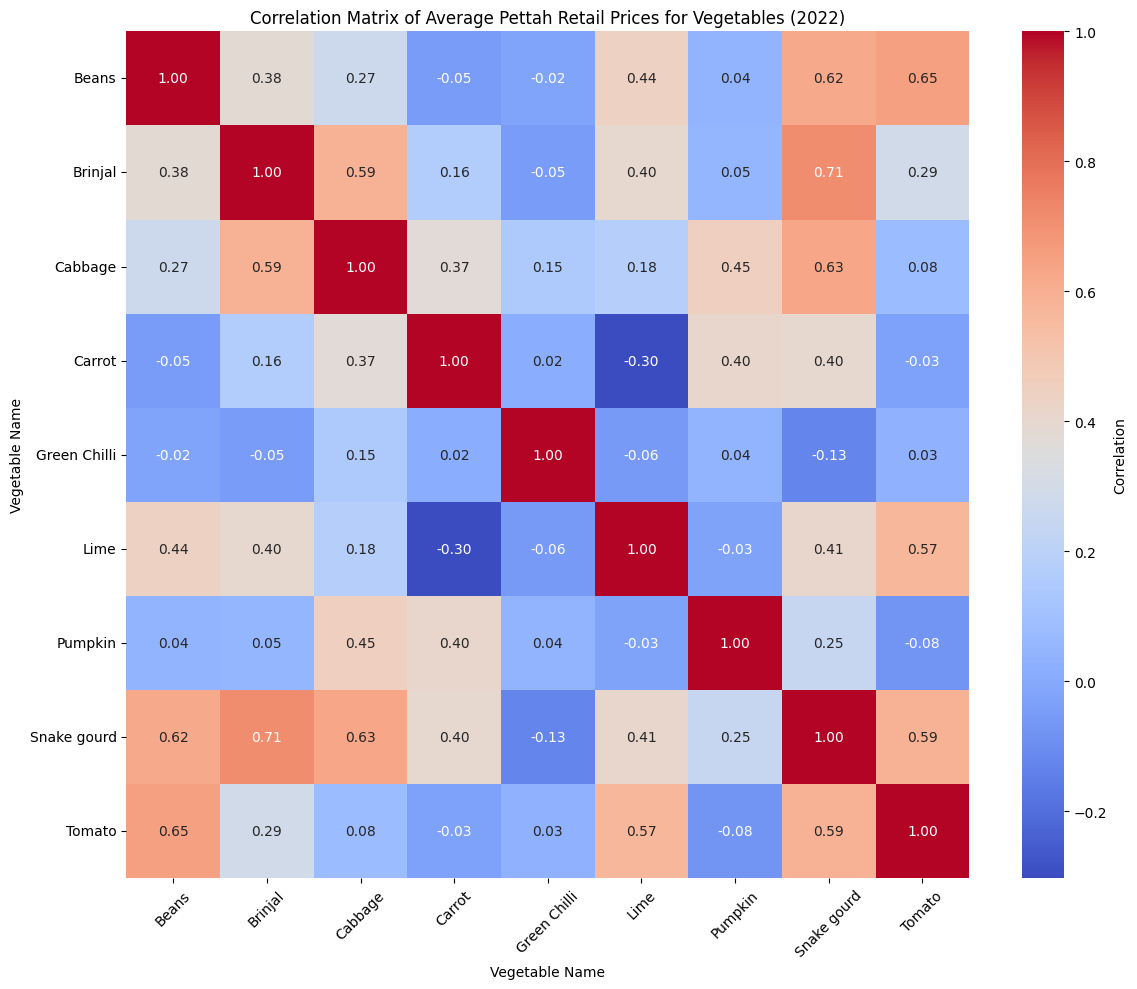

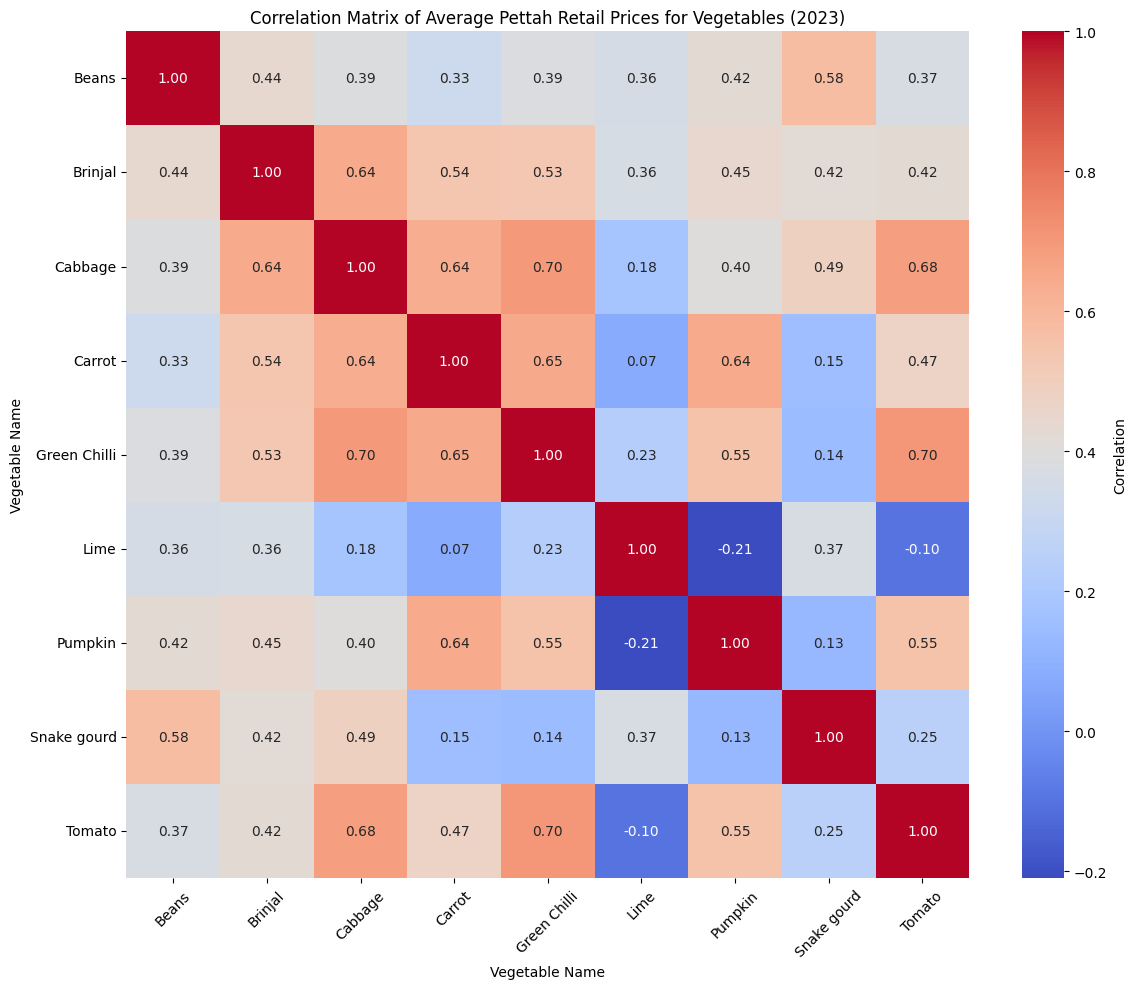

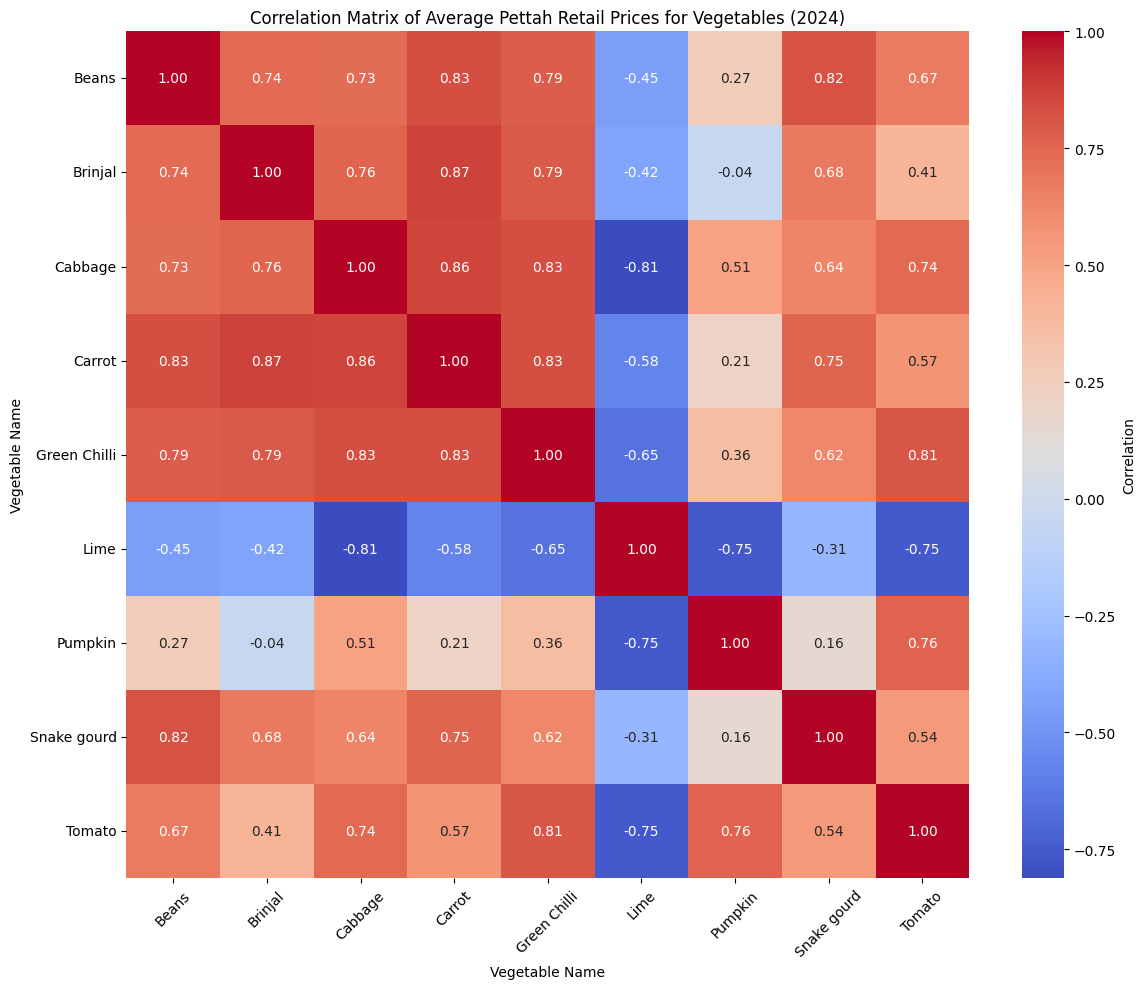

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
excel_filename = '/content/drive/MyDrive/pdfs/filled_null_with_dates_and_averages.xlsx'
xls = pd.ExcelFile(excel_filename)

# Combine data from all sheets into a single DataFrame
all_data = pd.concat([pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names], ignore_index=True)

# Ensure Date column is parsed
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')

# Extract year from the date
all_data['Year'] = all_data['Date'].dt.year

# List of years to analyze
years_to_analyze = [2022, 2023, 2024]

for year in years_to_analyze:
    # Filter the data for the current year
    data_year = all_data[all_data['Year'] == year]

    # Verify if we have any data for the current year
    if data_year.empty:
        print(f"No data available for the year {year}.")
    else:
        # Check if the average retail prices are already calculated
        if 'Average Pettah Retail Price' not in data_year.columns:
            # Calculate the Average Pettah Retail Price for each vegetable
            data_year['Average Pettah Retail Price'] = data_year[
                ['Yesterday Retail prices in Pettah', 'Today Retail prices in Pettah']
            ].mean(axis=1)

        # Create a pivot table with vegetables as columns and average prices as values
        pivot_table_year = data_year.pivot_table(
            index='Date',
            columns='Vegetable Name',
            values='Average Pettah Retail Price',
            aggfunc='mean'
        )

        # Drop columns with all NaN values
        pivot_table_year.dropna(axis=1, how='all', inplace=True)

        # Verify if the pivot table has valid data
        if pivot_table_year.empty:
            print(f"No valid data available for calculating the correlation matrix in {year}.")
        else:
            # Calculate the correlation matrix for vegetables
            corr_matrix_year = pivot_table_year.corr()

            # Check if correlation matrix is not empty
            if corr_matrix_year.empty:
                print(f"The correlation matrix is empty for the year {year}. Check for data issues.")
            else:
                # Plot the correlation matrix
                plt.figure(figsize=(12, 10))
                sns.heatmap(corr_matrix_year, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
                plt.title(f'Correlation Matrix of Average Pettah Retail Prices for Vegetables ({year})')
                plt.xticks(rotation=45)
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.show()
